In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

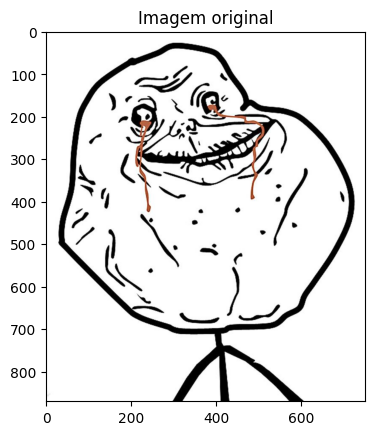

In [3]:
image = cv2.imread("./imgs/forever-alone.jpg")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

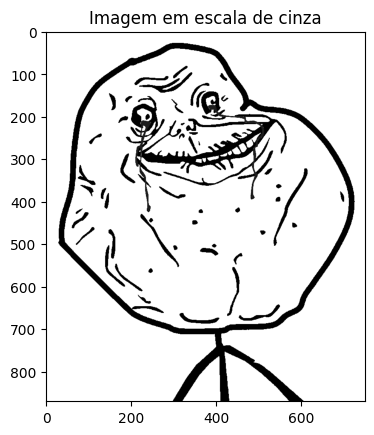

In [4]:
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)

plt.imshow(bw , cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

In [16]:
def expansion(BW_img,kernel):
    # Create a new image with the same size of the original
    img_shape = BW_img.shape
    # Create a new image with the same size of the original
    new_img = np.zeros(img_shape)
    # Get the size of the kernel
    kernel_shape = kernel.shape
    # Get the center of the kernel
    centers = [int((kernel_shape[0]-1)/2),int((kernel_shape[1]-1)/2)]
    # Iterate over the image
    print("Image shape:",img_shape)
    print("Center:",centers)
    centerx = centers[0]
    centery = centers[1]
    for x in range( centerx,img_shape[0] - centerx):
        for y in range(centery,img_shape[1] - centery):
            # Iterate over the kernel
            slice_img = BW_img[x-centery:x+centery+1,y-centery:y+centery+1]
            # check if any pixel in the slice matches the kernel
            if np.any(slice_img == kernel):
                new_img[x,y] = 255 
    return new_img

In [17]:
kernel3 = np.ones((3,3), np.uint8)
kernel5 = np.ones((5,5), np.uint8)
kernel7 = np.ones((7,7), np.uint8)
kernelcircle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
dilation3 = expansion(bw,kernel3)
dilation5 = expansion(bw,kernel5)
dilation7 = expansion(bw,kernel7)
dilationcircle = expansion(bw,kernelcircle)

Image shape:
(870, 750)

Center:
[1, 1]

Image shape:
(870, 750)

Center:
[2, 2]

Image shape:
(870, 750)

Center:
[3, 3]

Image shape:
(870, 750)

Center:
[10, 10]

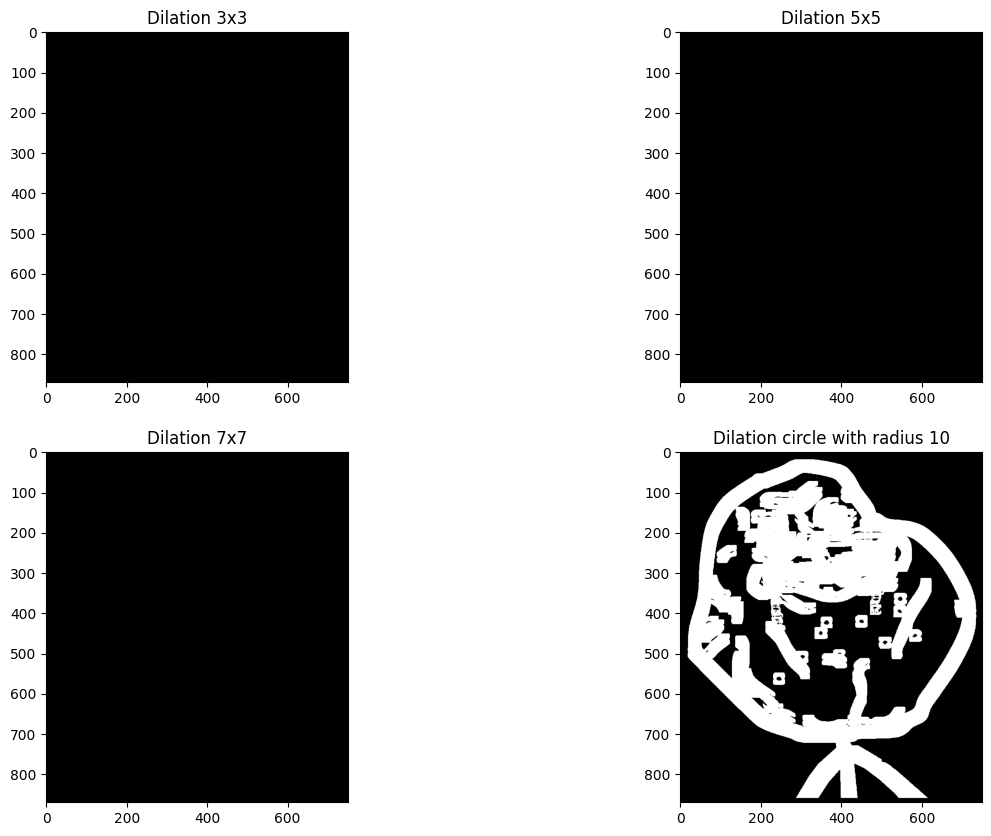

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].imshow(dilation3, cmap="gray")
axs[0, 0].set_title("Dilation 3x3")
axs[0, 1].imshow(dilation5, cmap="gray")
axs[0, 1].set_title("Dilation 5x5")
axs[1, 0].imshow(dilation7, cmap="gray")
axs[1, 0].set_title("Dilation 7x7")
axs[1, 1].imshow(dilationcircle, cmap="gray")
axs[1, 1].set_title("Dilation circle with radius 10")
plt.show()